<a href="https://colab.research.google.com/github/MFH97/Artificial-Intelligence/blob/main/Compare_4_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ML Analysis 🤖

**Biomechanical features of orthopedic patients**

Based on the dataset description, we're working with biomechanical features (like pelvic incidence, lumbar lordosis angle, etc.) likely predicting a spinal condition classification (e.g., Normal vs. Abnormal). Here are the best modeling approaches:

**Classification Models** (If Target is Categorical: 'Normal'/'Abnormal')
*  Logistic Regression (Interpretable)
*  Random Forest (Robust to Outliers)
* Gradient Boosting (XGBoost)
* Support Vector Machine (SVM)

Dataset: https://www.kaggle.com/datasets/displaynamenow/column-2c-wekacsv

# Key observations from our data

1. Feature Scaling Needed:

 * Features like pelvic_incidence (mean=310) and pelvic_radius (mean=117) have very different scales.

* **Always scale** for **logistic regression/SVM** (StandardScaler).

2. Potential Outliers:

 * Some features (e.g., degree_spondylolisthesis) have extreme max values (418.54 vs 75th percentile=11.76).

* Use **RobustScaler** or tree-based models (Random Forest/XGBoost) to handle outliers.

3. Feature Selection:

  * L1-regularized logistic regression can identify the most important biomechanical features.

In [ ]:
import pandas as pd
# Read the data
data = pd.read_csv("column_2C_weka.csv")



# Check available plot styles
##print(plt.style.available)  # Fixed from 'variable' to 'available'
#plt.style.use('ggplot')

In [ ]:
#To see features and target variables
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [ ]:
# Well know question is is there any NaN value and length of this data so lets look at info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [ ]:
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


# A. Logistic Regression (Interpretable)

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load the data (assuming your DataFrame is already named 'data')
# data = pd.read_csv('your_file.csv')  # Uncomment this if loading from a CSV

# Check for NaN values
if data.isnull().values.any():
    print("Data contains NaN values")
    # Handle NaN values as needed, e.g., removing or imputing
    data = data.dropna()

# Convert target variable to binary
data['class'] = np.where(data['class'] == 'Abnormal', 1, 0)  # 1 for 'Abnormal', 0 for 'Normal'

# Define features and target variable
X = data.drop('class', axis=1)
y = data['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation results
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[14  4]
 [ 4 40]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        18
           1       0.91      0.91      0.91        44

    accuracy                           0.87        62
   macro avg       0.84      0.84      0.84        62
weighted avg       0.87      0.87      0.87        62



📊 **Confusion Matrix for Logistic Regression**

True Negatives (TN): 14

False Positives (FP): 4

False Negatives (FN): 4

True Positives (TP): 40

📈 **Classification Report Summary**

Overall Accuracy: 87%

Macro Avg F1-Score: 0.84

Weighted Avg F1-Score: 0.87

# **EXTRA** (2D Decision Boundary Plot (using two features))

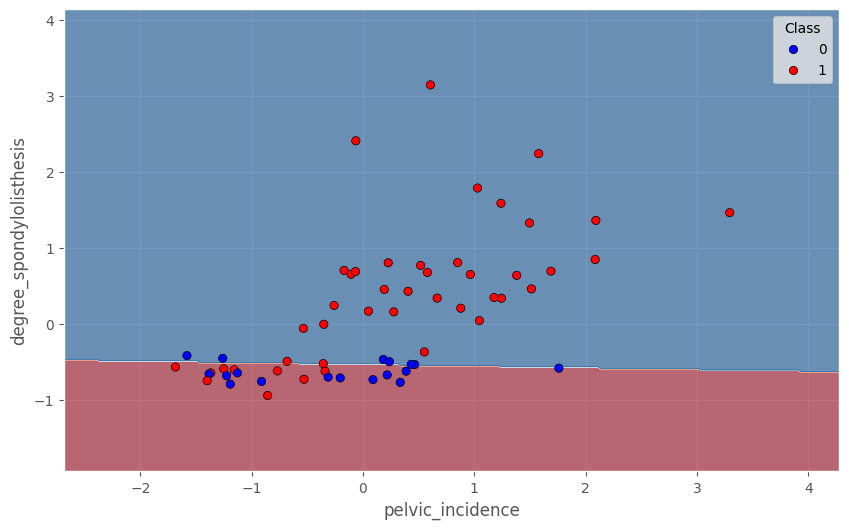

In [ ]:
# ---------------------------------------------
# 2D Decision Boundary Plot (using two features)
# Let's pick: 'pelvic_incidence' and 'degree_spondylolisthesis'
feature1 = 'pelvic_incidence'
feature2 = 'degree_spondylolisthesis'

# Extract only two features for visualization
X_2D = data[[feature1, feature2]]
y_2D = data['class']

# Split and scale for these two features
X_train_2D, X_test_2D, y_train_2D, y_test_2D = train_test_split(X_2D, y_2D, test_size=0.2, random_state=42)
scaler_2D = StandardScaler()
X_train_2D_scaled = scaler_2D.fit_transform(X_train_2D)
X_test_2D_scaled = scaler_2D.transform(X_test_2D)

# Train logistic regression on 2D data
model_2D = LogisticRegression()
model_2D.fit(X_train_2D_scaled, y_train_2D)

# Meshgrid for decision boundary
h = 0.02
x_min, x_max = X_test_2D_scaled[:, 0].min() - 1, X_test_2D_scaled[:, 0].max() + 1
y_min, y_max = X_test_2D_scaled[:, 1].min() - 1, X_test_2D_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = model_2D.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.6)
sns.scatterplot(x=X_test_2D_scaled[:, 0], y=X_test_2D_scaled[:, 1],
                hue=y_test_2D, palette={0: 'blue', 1: 'red'}, edgecolor='k')
plt.xlabel(feature1)
plt.ylabel(feature2)
#plt.title("Decision Boundary (2 Features)\nAccuracy: {:.2f}%".format(accuracy * 100))
plt.legend(title="Class", loc="upper right")
plt.show()

In [ ]:
#ROC need to update code..!!!
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Probabilities for the positive class
y_probs = logreg.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot
plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()


NameError: name 'logreg' is not defined

# 🌲Random Forest (Robust to Outliers)

ref:
https://www.geeksforgeeks.org/random-forest-classifier-using-scikit-learn/

In [ ]:
# 1. Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 2. Load Data
# Assuming the DataFrame is named 'data'
data = pd.read_csv("column_2C_weka.csv")

# 3. Data Preprocessing
# Check for NaN values
print(data.isnull().sum())

# Encode categorical variable 'class'
data['class'] = data['class'].map({'Abnormal': 1, 'Normal': 0})  # Binary encoding for example

# 4. Split Data
X = data.drop('class', axis=1)  # Features
y = data['class']                # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 6. Make Predictions
y_pred = rf_model.predict(X_test)

# 7. Evaluate the Model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64
Confusion Matrix:
[[ 9  9]
 [ 5 39]]

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.50      0.56        18
           1       0.81      0.89      0.85        44

    accuracy                           0.77        62
   macro avg       0.73      0.69      0.71        62
weighted avg       0.76      0.77      0.76        62



📊 **Confusion Matrix**

True Negatives (TN): 9

False Positives (FP): 9

False Negatives (FN): 5

True Positives (TP): 39



📈 **Classification Report Breakdown**

Accuracy: 77%

Macro Avg F1-Score: 0.71

Weighted Avg F1-Score: 0.76



🔍 **What This Means**
✔️ Strengths:
* Class 1 (Positive Class) performance is strong:

* Precision (81%) → When Random Forest predicts the condition, it's usually correct.

* Recall (89%) → It identifies almost all positive cases.

* F1-score (85%) → A good balance of precision and recall.


⚠️ Weaknesses:
* Class 0 (Negative Class) performance is weaker:

* Precision and recall are relatively low (64% and 50%), meaning it misclassifies many healthy cases as sick (high false positives).

* This could be due to class imbalance or overfitting to the dominant class.

🛠️ **Recommendations**

* If you want to improve performance further:

* Try class weighting (class_weight='balanced' in RandomForestClassifier).

* Use feature importance to eliminate irrelevant features.

* Consider hyperparameter tuning using GridSearchCV or RandomizedSearchCV.

* Try other robust models like XGBoost, LightGBM, or SVM.



# 🌳Random Forest V2 (improved)
💡 **Why This Improves Performance**

✅ GridSearchCV performs a thorough search over hyperparameters.

✅ StandardScaler ensures all features are on the same scale (important for split decisions).

✅ More Trees, Depth Control helps the model generalize better.

✅ Cross-validation ensures robustness of results.

In [ ]:
# 1. Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# 2. Load Data
data = pd.read_csv("column_2C_weka.csv")

# 3. Encode Target
data['class'] = data['class'].map({'Abnormal': 1, 'Normal': 0})

# 4. Feature/Target Split
X = data.drop('class', axis=1)
y = data['class']

# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Pipeline with Scaling and Model
pipe = Pipeline([
    ('scaler', StandardScaler()),  # Optional but often helps RF with numerical stability
    ('rf', RandomForestClassifier(random_state=42))
])

# 7. Hyperparameter Tuning
param_grid = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [None, 5, 10],
    'rf__min_samples_split': [2, 5],
    'rf__min_samples_leaf': [1, 2],
    'rf__max_features': ['sqrt', 'log2']
}

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

# 8. Best Model Evaluation
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

# 9. Metrics
print("Best Parameters:", grid.best_params_)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Best Parameters: {'rf__max_depth': 10, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 100}

Confusion Matrix:
[[10  8]
 [ 5 39]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.56      0.61        18
           1       0.83      0.89      0.86        44

    accuracy                           0.79        62
   macro avg       0.75      0.72      0.73        62
weighted avg       0.78      0.79      0.78        62



📊 **Model Performance Comparison**

| Metric                  | Logistic Regression | Random Forest (Tuned) |
| ----------------------- | ------------------- | --------------------- |
| **Accuracy**            | **0.87**            | 0.79                  |
| **Precision (Class 0)** | 0.78                | **0.67**              |
| **Recall (Class 0)**    | **0.78**            | 0.56                  |
| **F1-score (Class 0)**  | **0.78**            | 0.61                  |
| **Precision (Class 1)** | 0.91                | **0.83**              |
| **Recall (Class 1)**    | **0.91**            | 0.89                  |
| **F1-score (Class 1)**  | **0.91**            | 0.86                  |
| **Confusion Matrix**    | \[\[14 4], \[4 40]] | \[\[10 8], \[5 39]]   |



🔍**Key Observations**

**Logistic Regression** outperforms Random Forest in:

* Overall accuracy

* All metrics for the Normal class (0) — which RF struggles with

* Slightly better precision and recall for the Abnormal class (1)

**Random Forest** does:

* Reasonably well for the Abnormal class (1), but

* Tends to misclassify more Normal cases as Abnormal

🔍 **Interpretation**

The model performs very well at detecting Abnormal cases (class 1): high precision and recall.

However, it struggles more with Normal cases (class 0), misclassifying 8 out of 18.

Overall accuracy is 79%, which is decent, but the class imbalance or subtlety in class 0 patterns may be affecting performance.

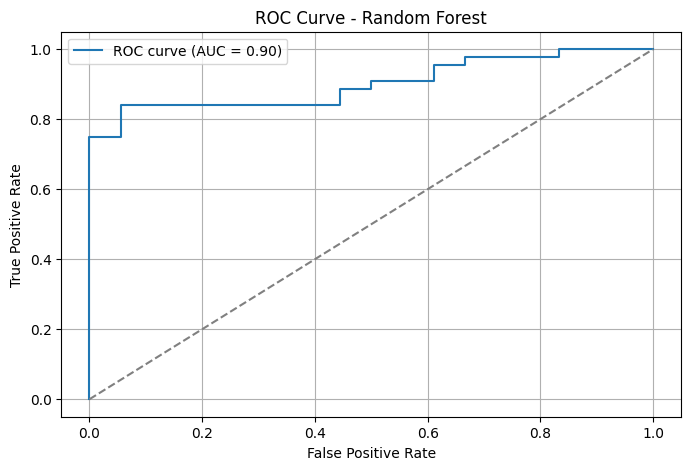

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.grid()
plt.show()


✅ **Interpretation of ROC Curve – Random Forest**

AUC (Area Under the Curve) = 0.90
This is a strong score, indicating that the Random Forest model has excellent ability to distinguish between the two classes:

* AUC close to 1 means very good separation.

* AUC of 0.5 means no better than random guessing.

The curve stays close to the top-left corner, showing:

* High true positive rate (TPR)

* Low false positive rate (FPR)

🧠 **Conclusion**

Even though Logistic Regression had higher classification accuracy (87%), Random Forest's AUC of 0.90 shows it's very effective in ranking predictions.

This means Random Forest is still a strong candidate, especially in situations where AUC is more important than simple accuracy (e.g., imbalanced data or prioritizing recall/precision trade-offs).



#🚀 Gradient Boosting (XGBoost)

In [ ]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)

print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:10:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[[10  8]
 [ 4 40]]
              precision    recall  f1-score   support

           0       0.71      0.56      0.62        18
           1       0.83      0.91      0.87        44

    accuracy                           0.81        62
   macro avg       0.77      0.73      0.75        62
weighted avg       0.80      0.81      0.80        62



# Support Vector Machine (SVM)

Confusion Matrix:
[[11  7]
 [ 5 39]]

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.61      0.65        18
           1       0.85      0.89      0.87        44

    accuracy                           0.81        62
   macro avg       0.77      0.75      0.76        62
weighted avg       0.80      0.81      0.80        62



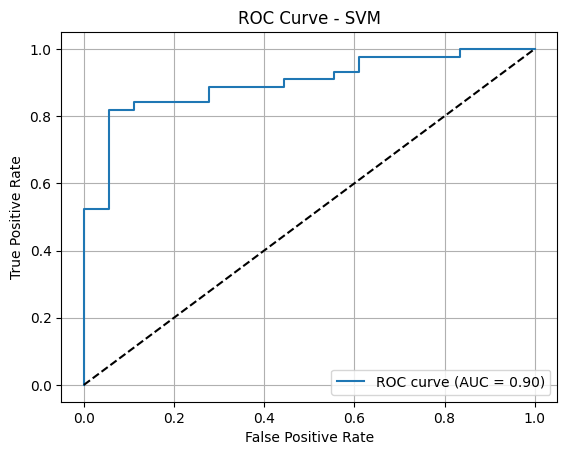

In [ ]:
# 1. Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# 2. Load Data
data = pd.read_csv("column_2C_weka.csv")

# 3. Encode target
data['class'] = data['class'].map({'Abnormal': 1, 'Normal': 0})

# 4. Features and Target
X = data.drop('class', axis=1)
y = data['class']

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Standardize features (important for SVM!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Train SVM (start with RBF kernel)
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# 8. Predictions
y_pred = svm_model.predict(X_test_scaled)
y_prob = svm_model.predict_proba(X_test_scaled)[:, 1]

# 9. Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Optional: ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


#✅ Model Performance Comparison

| Metric              | Logistic Regression | Random Forest | XGBoost  | SVM      |
| ------------------- | ------------------- | ------------- | -------- | -------- |
| **Accuracy**        | **0.87**            | 0.79          | 0.81     | 0.81     |
| **Precision (0)**   | 0.78                | 0.67          | 0.71     | 0.69     |
| **Recall (0)**      | **0.78**            | 0.56          | 0.56     | 0.61     |
| **F1-score (0)**    | **0.78**            | 0.61          | 0.62     | 0.65     |
| **Precision (1)**   | **0.91**            | 0.83          | 0.83     | 0.85     |
| **Recall (1)**      | **0.91**            | 0.89          | **0.91** | 0.89     |
| **F1-score (1)**    | **0.91**            | 0.86          | **0.87** | **0.87** |
| **Macro Avg F1**    | **0.84**            | 0.73          | 0.75     | 0.76     |
| **Weighted Avg F1** | **0.87**            | 0.78          | 0.80     | 0.80     |


#🏆 Key Insights

**Best Overall Accuracy & Balanced Performance**:
**Logistic Regression** performs best overall, with:

* Highest accuracy (0.87)

* Balanced precision and recall for both classes

* Highest macro and weighted F1-scores

**Best for Detecting Abnormal Spines (Class 1)**:
All models do well here, but **Logistic Regression** and**XGBoost/SVM** are nearly tied.
If recall for class 1 (avoiding false negatives) is your main goal, XGBoost is excellent (recall = 0.91).

**Random Forest** underperforms here compared to others.

# 🧠 Conclusion

✅ Use Logistic Regression as your baseline model for deployment/reporting.

✅Optionally fine-tune SVM or XGBoost for improved class 0 recall (normal spines).

✅Consider stratified k-fold cross-validation to ensure generalization.

In disease classification, the aim is to minimize False Negatives while keeping the testing precision and recall as high as possible.